# Scrapper de la página de Wikimedia Commons

La página de Wikimedia Commons

https://commons.m.wikimedia.org/wiki/Main_Page

muestra al principio una sección llamada **'Imagen del día'**

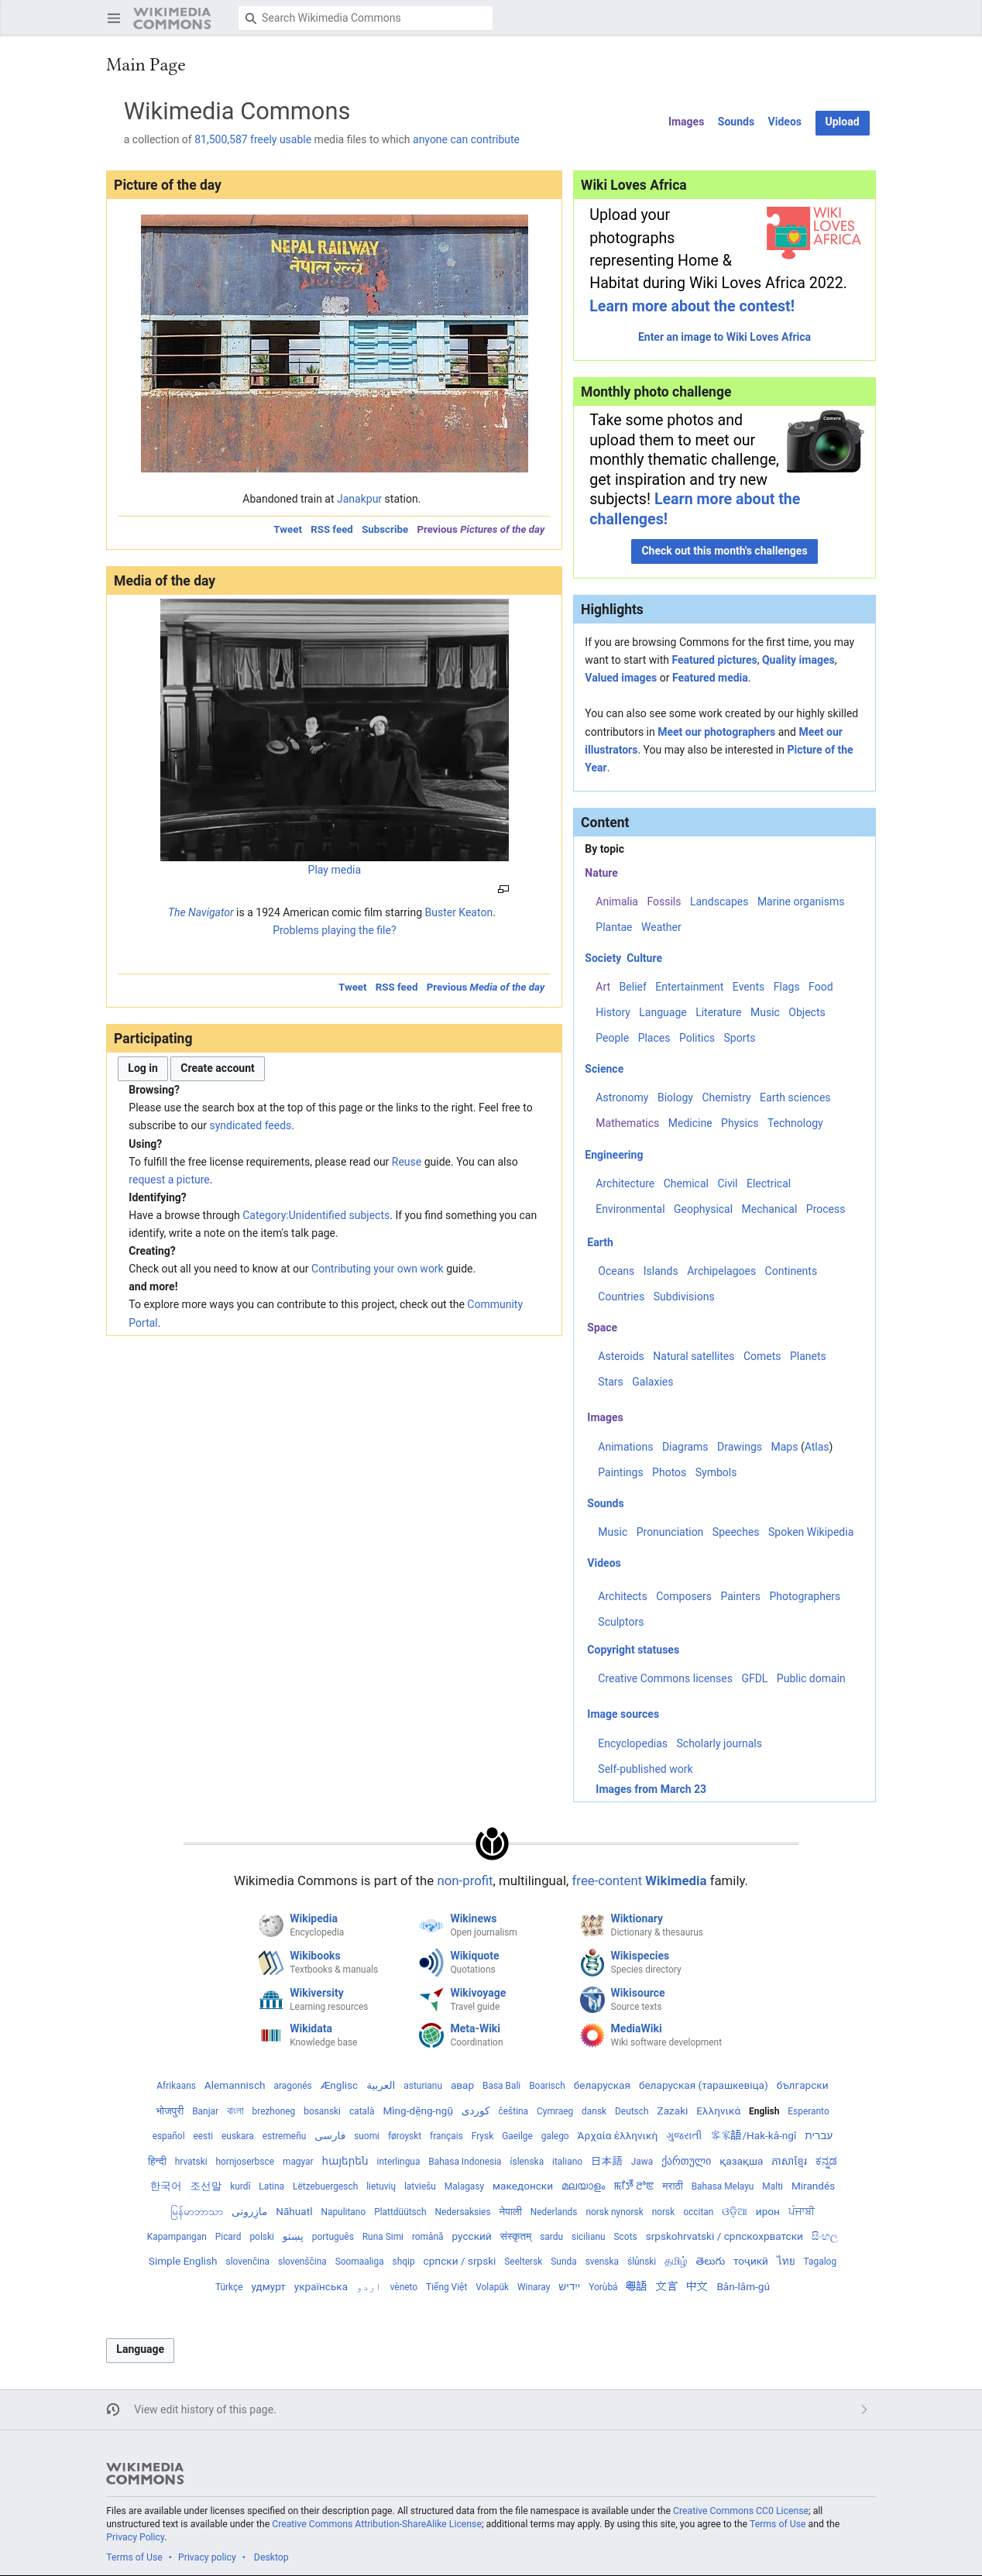

El objetivo de este cuaderno será la de descargar dicha imagen del día.

Comencemos importando las bibliotecas necesarias para esto:

In [1]:
import requests
from bs4 import BeautifulSoup
import shutil

import re
import datetime
import os

import cv2
import matplotlib.pyplot as plt

Necesitamos el url de la página de Wikimedia Commons, el cual se obtiene desde la paǵina:

In [2]:
url = 'https://commons.m.wikimedia.org/wiki/Main_Page'
headers = {'user-agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0'}

Con los datos ya podemos hacer la petición a la página:

In [3]:
response = requests.get(url, headers=headers)

Veamos el status de la respuesta:

In [4]:
response.status_code

200

El código 200 se traduce en que la petición se ha realizado con éxito.

En caso de querer guardar el HTML de la página podemos correr la siguiente celda (la cual está comentada por default):

In [5]:
# with open('wikimedia.html', 'w', encoding='utf-8') as f:
#     f.write(response.text)

Ya con la respuesta afirmativa de la petición usemos la librería bs4 para manejar facilmente el código de la página:

In [6]:
soup = BeautifulSoup(response.text, 'html.parser')

Ya con esto tenemos que encontrar la etiqueta que corresponde a la imagen del día, veamos:

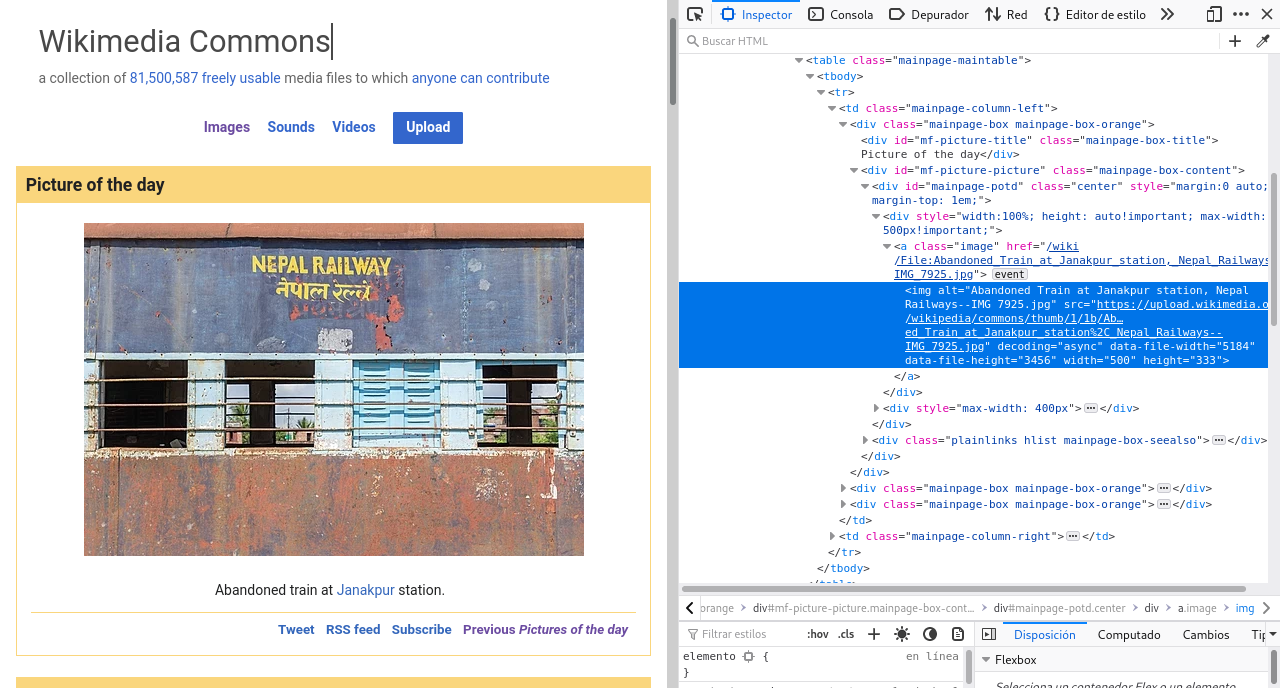

La imagen se encuentra en la etiqueta ```a``` y tiene como atributo ```class=image``` y además es la subetiqueta de ```a``` con nombre ```img```. Finalmente el link de nuestro interés se encuentra en el atributo ```src``` de la subetiqueta.

Vamos a por ella:

In [7]:
url_img = soup.find('a', class_='image').find('img')['src']
url_img

'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Abandoned_Train_at_Janakpur_station%2C_Nepal_Railways--IMG_7925.jpg/500px-Abandoned_Train_at_Janakpur_station%2C_Nepal_Railways--IMG_7925.jpg'

Algo similar se hace para encontrar el título de la imagen del día:

In [8]:
title = soup.find('div', class_='description').text.strip().strip('.')
title

'Abandoned train at Janakpur station'

Ya con el link de la imagen podemos volver a usar ```requests``` para obtenerla:

In [9]:
response_img = requests.get(url_img, stream=True)

Veamos si la petición tuvo éxito:

In [10]:
response_img.ok

True

La petición ha sido un éxito.

Ahora debemos de ser capaces de atrapar la extensión del archivo para poder guardarlo en el formato correcto. Para ello usemos una expresión regular:

In [11]:
regex = r'\..{3,4}$'
extension = re.search(regex, url_img).group()
extension

'.jpg'

Finalmente creamos el archivo a partir de la petición sobre el url obtenido:

In [12]:
fecha = datetime.date.today().strftime('%d/%m/%Y')
fecha

'23/03/2022'

Antes de guardar la imagen conviene cerciorarse de que no ha sido guardada antes. En caso de no ser así, entonces hay que guardarla:

In [13]:
name = f'{title}{extension}'

if not os.path.exists(name):
    with open(name, 'wb') as f_img:
        response_img.raw.decode_content = True
        shutil.copyfileobj(response_img.raw, f_img)
    print('Imagen descargada y guardada')
else:
    print('La imagen del día ya ha sido descargada con anterioridad')

La imagen del día ya ha sido descargada con anterioridad


Listo!

Veamos si lo logramos. Carguemos la imagen:

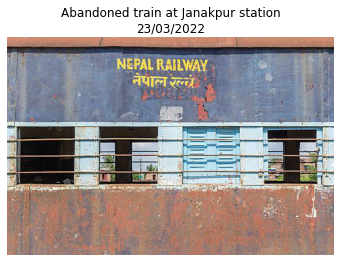

In [14]:
img = cv2.imread(name)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb, cmap='gray')
plt.title(f'{title}\n{fecha}')
plt.axis('off')
plt.show()

Listo!

Al parecer lo hemos logrado